In [2]:
import pandas as pd
import datetime

import json as json
from pandas.io.json import json_normalize

import numpy as np
import os
import scipy.optimize as sco
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#import pandas_profiling


In [3]:
array_dataframe = []
dados = pd.DataFrame([])
scoins = []

folder_candle = 'Operacoes'

for folder in os.scandir(folder_candle):
    scoins.append(folder.name)
    for entry in os.scandir(folder):
        if entry.is_file():
            coin_symbol = (os.path.splitext(entry.name)[0])        
            with open(entry.path) as d:            
                coin_hist = json.load(d);
            df = json_normalize(coin_hist);
            
            if not df.empty:
            
                df['coin'] = folder.name
                df['amount'] = pd.to_numeric(df['amount'].replace('.',','))
                df['rate'] = pd.to_numeric(df['total'].replace('.',','))
                df['total'] = pd.to_numeric(df['total'].replace('.',','))
                df['date'] = pd.to_datetime(df['date'])            
                df['day'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.date
                
                array_dataframe.append(df)       
            else:
                print(entry.path)

dados = pd.concat(array_dataframe)

dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)
#dados.set_index('date','coin'], inplace= True)
dados.head()

Operacoes/USDT_BTC/2018-11.json
Operacoes/USDT_BTC/2018-12.json
Operacoes/USDT_ETH/2018-11.json
Operacoes/USDT_ETH/2018-12.json
Operacoes/USDT_LTC/2018-11.json
Operacoes/USDT_LTC/2018-12.json
Operacoes/USDT_ZEC/2018-11.json
Operacoes/USDT_ZEC/2018-12.json


,amount,date,globalTradeID,rate,total,tradeID,type,coin,day
0,0.010240,2016-02-29 02:56:38,18015876,4.464168,4.464168,84413,sell,USDT_BTC,2016-02-29
1,0.014463,2016-02-29 02:56:36,18015868,6.304939,6.304939,84412,sell,USDT_BTC,2016-02-29
2,0.001508,2016-02-29 02:54:27,18015626,0.657316,0.657316,84411,sell,USDT_BTC,2016-02-29
3,0.180348,2016-02-29 02:52:27,18015402,78.702099,78.702099,84410,buy,USDT_BTC,2016-02-29
4,0.064586,2016-02-29 02:52:13,18015379,28.184589,28.184589,84409,buy,USDT_BTC,2016-02-29


In [4]:
grouped_data = dados.groupby('coin', as_index=False)

sorted_grouped_data = sorted(
    grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
    key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
    reverse=True  # largest first
)

grouped_data.describe()

amount                                                                   \
       count      mean        std           min       25%       50%       75%   
0  1683410.0  0.171925   0.660262  0.000000e+00  0.000526  0.010000  0.098986   
1  1587911.0  4.203365  22.911278  0.000000e+00  0.009893  0.178640  1.454459   
2  1140174.0  7.105958  35.784909  0.000000e+00  0.016529  0.089100  2.171274   
3  1025807.0  1.079658   5.076648  1.000000e-08  0.007617  0.038322  0.423589   

               globalTradeID                   ...           total  \
           max         count          mean     ...             75%   
0    77.416313     1683410.0  1.901687e+08     ...      248.928627   
1  5940.402166     1587911.0  1.988983e+08     ...      191.000070   
2  5023.678214     1140174.0  2.383733e+08     ...      100.000000   
3   818.355450     1025807.0  2.420169e+08     ...       87.320582   

                    tradeID                                              \
             max      count          mean           std  min        25%   
0  439452.851135  1683410.0  9.511627e+06  9.856208e+06  1.0  793440.25   
1  463163.097540  1587911.0  4.226974e+06  3.956927e+06  1.0  534934.50   
2  299591.508000  1140174.0  2.772865e+06  2.176266e+06  1.0  482717.25   
3  247961.676387  1025807.0  1.585755e+06  1.179708e+06  1.0  459388.50   

                                       
         50%          75%         max  
0  5284853.5  19703694.75  25680910.0  
1  3053929.0   8593186.50  10474497.0  
2  2397991.5   4901231.75   5770936.0  
3  1272942.0   2811909.50   3228680.0  

[4 rows x 40 columns]

In [5]:
seg_semestr2017 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2018,1,1)) ])
seg_semestr2017.set_index('date', inplace=True)
seg_semestr2017.head()

,amount,globalTradeID,rate,total,tradeID,type,coin,day
date,,,,,,,,
2017-10-31 02:00:00,0.000081,249279616,0.499978,0.499978,9878243,sell,USDT_BTC,2017-10-31
2017-10-31 02:00:00,0.000081,249279615,0.499978,0.499978,9878242,sell,USDT_BTC,2017-10-31
2017-10-31 02:00:00,0.000244,249279614,1.499935,1.499935,9878241,sell,USDT_BTC,2017-10-31
2017-10-31 01:59:59,0.000081,249279613,0.499978,0.499978,9878240,sell,USDT_BTC,2017-10-31
2017-10-31 01:59:58,0.000488,249279610,3.000361,3.000361,9878239,buy,USDT_BTC,2017-10-31


In [6]:
n_dt = pd.DataFrame([])

n_dt['date'] = dados['day'];
n_dt['amount'] = dados['amount'];
n_dt['rate'] = dados['rate'];
n_dt['type'] = dados['type'];
n_dt['coin'] = dados['coin'];

n_dt = n_dt.groupby(by=['date','coin','type'])
n_dt.describe()

amount                                      \
                           count       mean        std           min   
date       coin     type                                               
2015-02-19 USDT_BTC buy      9.0   0.015467   0.014623  1.790000e-06   
                    sell     3.0   0.017971   0.014588  1.127140e-03   
2015-02-20 USDT_BTC buy      2.0   0.058229   0.055550  1.894957e-02   
                    sell     9.0   0.012663   0.014303  1.747800e-04   
2015-02-21 USDT_BTC buy      1.0   0.060091        NaN  6.009077e-02   
2015-02-22 USDT_BTC buy      2.0   0.010975   0.001356  1.001607e-02   
                    sell    25.0   0.020684   0.051883  6.070000e-06   
2015-02-23 USDT_BTC buy      2.0   0.012474   0.017370  1.914900e-04   
                    sell    16.0   0.024124   0.037526  1.505000e-05   
2015-02-24 USDT_BTC buy      2.0   0.311330   0.340599  7.049080e-02   
                    sell     2.0   0.002044   0.002759  9.330000e-05   
2015-02-25 USDT_BTC sell     7.0   0.132507   0.058148  7.454000e-02   
2015-02-26 USDT_BTC buy     11.0   0.000046   0.000027  5.720000e-06   
                    sell     2.0   0.000070   0.000081  1.284000e-05   
2015-02-27 USDT_BTC buy     18.0   0.087127   0.129092  1.799000e-05   
                    sell     3.0   0.006918   0.007836  6.131400e-04   
2015-03-01 USDT_BTC buy      2.0   0.000589   0.000685  1.043800e-04   
                    sell     1.0   0.000092        NaN  9.201000e-05   
2015-03-02 USDT_BTC buy      3.0   0.125612   0.114977  3.968300e-04   
                    sell     3.0   0.000732   0.000698  5.620000e-06   
2015-03-03 USDT_BTC buy     14.0   0.026411   0.037825  1.000000e-04   
                    sell    74.0   0.017564   0.028085  1.575300e-04   
2015-03-04 USDT_BTC buy      4.0   0.001873   0.003415  1.000000e-04   
                    sell    12.0   0.072622   0.194672  3.873300e-04   
2015-03-05 USDT_BTC buy      3.0   0.041161   0.034048  3.564280e-03   
                    sell    20.0   0.016141   0.020314  1.269000e-05   
2015-03-06 USDT_BTC buy     10.0   0.015719   0.019480  1.049600e-04   
                    sell     8.0   0.020010   0.033721  6.445000e-05   
2015-03-07 USDT_BTC buy      2.0   0.000347   0.000107  2.719000e-04   
                    sell     1.0   0.000005        NaN  5.000000e-06   
...                          ...        ...        ...           ...   
2018-10-15 USDT_ETH buy   5996.0   2.918466   9.929949  1.000000e-08   
                    sell  5805.0   2.585634   7.763576  1.000000e-08   
           USDT_LTC buy   1451.0   5.422936  22.134434  1.000000e-08   
                    sell  1384.0   6.967139  18.672227  1.100000e-07   
           USDT_ZEC buy    906.0   1.558984   5.011490  1.000000e-08   
                    sell   697.0   1.596193   4.017211  1.000000e-08   
2018-10-16 USDT_BTC buy   2018.0   0.098991   0.322070  1.000000e-08   
                    sell  2309.0   0.098613   0.325389  1.000000e-08   
           USDT_ETH buy   1005.0   1.993671   5.437803  1.000000e-08   
                    sell   847.0   2.209566   5.040326  2.000000e-08   
           USDT_LTC buy    316.0  10.473383  52.554260  1.000000e-08   
                    sell   474.0  10.772383  37.044510  1.597800e-04   
           USDT_ZEC buy    171.0   2.304993  12.429691  9.950000e-06   
                    sell   295.0   2.907692   4.765485  5.901000e-05   
2018-10-17 USDT_BTC buy   1667.0   0.074453   0.279011  1.000000e-08   
                    sell  2210.0   0.059761   0.146485  1.000000e-08   
           USDT_ETH buy    725.0   2.524105   7.842732  5.990000e-06   
                    sell  1537.0   2.901776   8.422500  1.000000e-06   
           USDT_LTC buy    223.0   4.690546  13.880566  1.059500e-04   
                    sell   308.0   6.402113  24.162002  3.240000e-05   
           USDT_ZEC buy    221.0   2.028789   4.897905  1.000000e-08   
                    sell   129.0   1.774317   3.946546  1.000000e-

In [74]:
novo = []
novo_df = pd.DataFrame([])

for name,group in n_dt:
    nv = {}
    nv['day'] = group.date.tolist()[0]
    nv['date'] = pd.to_datetime(group.date.tolist()[0])
    nv['coin'] = group.coin.tolist()[0]
    nv['coin_type'] = group.coin.tolist()[0]+'_'+group.type.tolist()[0]
    nv['amount'] = group.amount.sum()
    nv['rate'] = group.rate.mean()
    nv['type'] = group.type.tolist()[0]
    novo.append(nv)      

novo_df = pd.DataFrame(novo)
novo_df.set_index('day', inplace=True)
novo_df.head()    

,amount,coin,coin_type,date,rate,type
day,,,,,,
2015-02-19,0.139203,USDT_BTC,USDT_BTC_buy,2015-02-19,3.704106,buy
2015-02-19,0.053914,USDT_BTC,USDT_BTC_sell,2015-02-19,4.313121,sell
2015-02-20,0.116459,USDT_BTC,USDT_BTC_buy,2015-02-20,14.256728,buy
2015-02-20,0.113971,USDT_BTC,USDT_BTC_sell,2015-02-20,3.042382,sell
2015-02-21,0.060091,USDT_BTC,USDT_BTC_buy,2015-02-21,14.722239,buy


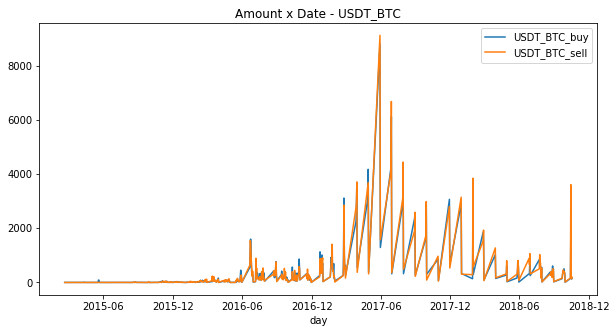

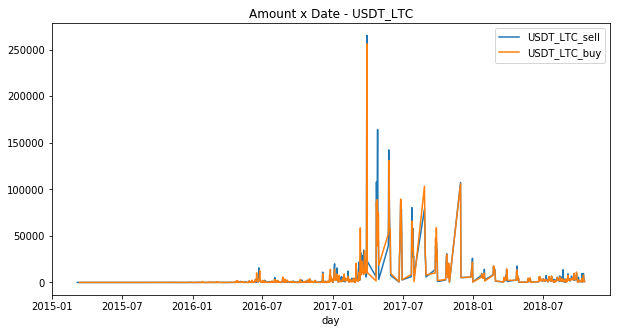

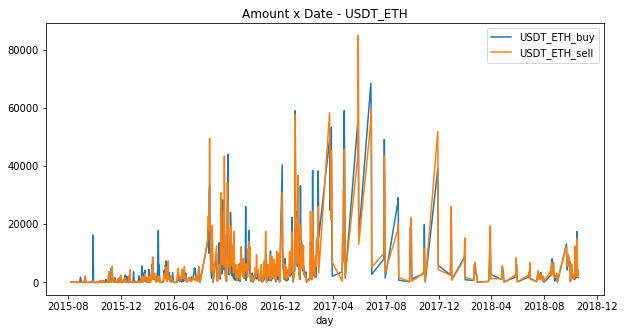

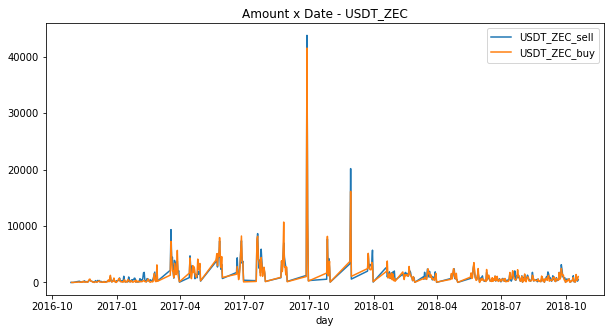

In [8]:
for coin in novo_df.coin.unique():
    fig, ax = plt.subplots(figsize=(8,6))
    for coin_type in novo_df[novo_df.coin == coin].coin_type.unique():
        novo_df[novo_df.coin_type == coin_type].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label= coin_type)
    plt.title('Amount x Date - '+coin)   

In [9]:

datas = novo_df.date.unique()
data_queda = []
btc_queda = []
btc_queda_df = pd.DataFrame([])


for data in datas:
    group = novo_df[novo_df.date == data] 
    btc_result = group[group.coin == 'USDT_BTC' ]
    if not btc_result.empty  :
        #print('tem btc')
        sell_amount = btc_result[btc_result.type == 'sell']
        buy_amount = btc_result[btc_result.type == 'buy']
        
        if sell_amount.amount.sum() > buy_amount.amount.sum() :
            data_queda.append(btc_result.date.tolist()[0])

#print(data_queda)

In [10]:
dt_periodo_queda_btc = novo_df[novo_df.date.isin(data_queda)]
dt_periodo_queda_btc.head()

,amount,coin,coin_type,date,rate,type
day,,,,,,
2015-02-22,0.021950,USDT_BTC,USDT_BTC_buy,2015-02-22,2.649204,buy
2015-02-22,0.517105,USDT_BTC,USDT_BTC_sell,2015-02-22,4.952914,sell
2015-02-23,0.024947,USDT_BTC,USDT_BTC_buy,2015-02-23,2.931313,buy
2015-02-23,0.385978,USDT_BTC,USDT_BTC_sell,2015-02-23,5.669059,sell
2015-02-25,0.927550,USDT_BTC,USDT_BTC_sell,2015-02-25,31.654871,sell


In [11]:
dt_periodo_queda_btc.pivot(columns='coin_type', values='amount').describe()

coin_type,USDT_BTC_buy,USDT_BTC_sell,USDT_ETH_buy,USDT_ETH_sell,USDT_LTC_buy,USDT_LTC_sell,USDT_ZEC_buy,USDT_ZEC_sell
count,308.000000,322.000000,218.000000,217.000000,244.000000,244.000000,73.000000,73.000000
mean,263.316667,307.004956,5086.206630,5032.157790,3241.288492,3380.166665,1553.748215,1622.429791
std,812.002344,885.503008,10006.241362,10550.410864,17664.306265,18173.800278,5037.716487,5247.073838
min,0.000029,0.000033,0.001910,0.009855,0.000115,0.000295,0.054045,0.100408
25%,0.269022,0.768128,262.760472,201.772240,1.125670,1.148056,152.527038,196.496915
50%,10.126296,15.893948,1810.260984,1437.934675,34.530686,56.234283,395.137595,503.031466
75%,162.656674,225.284773,4886.123324,4460.029490,1297.923920,1326.749576,1197.937013,1186.606107
max,8810.020918,9118.488501,78810.480898,84928.500302,256325.347574,265420.376372,41545.577949,43790.796824


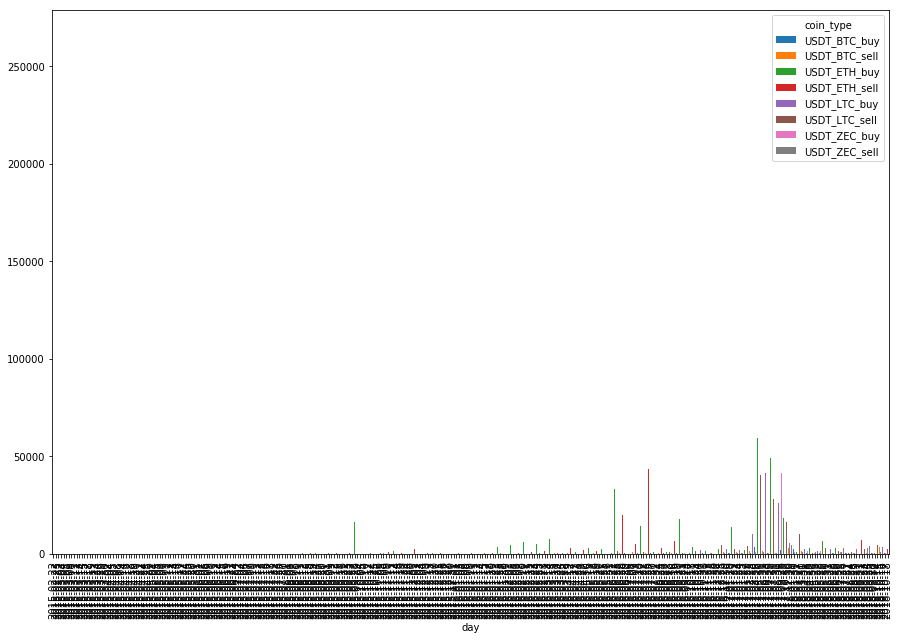

In [12]:
dt_periodo_queda_btc.pivot(columns='coin_type', values='amount').plot(kind='bar', figsize=(15,10))

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

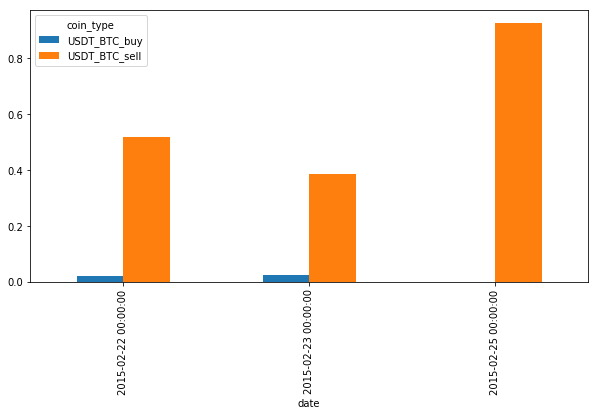

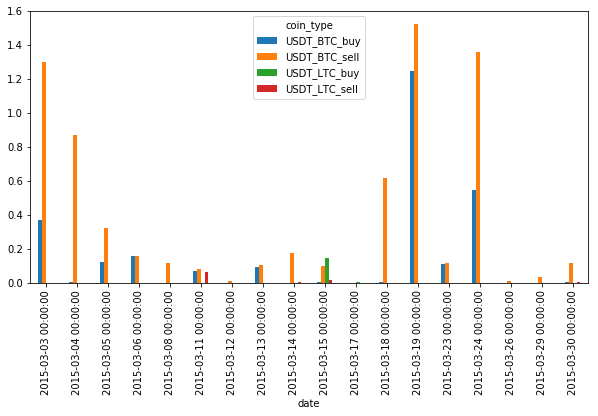

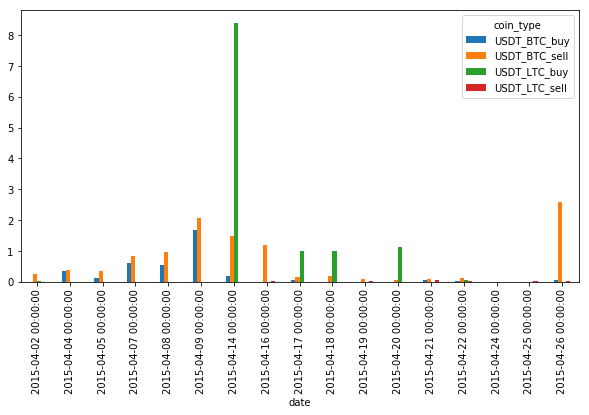

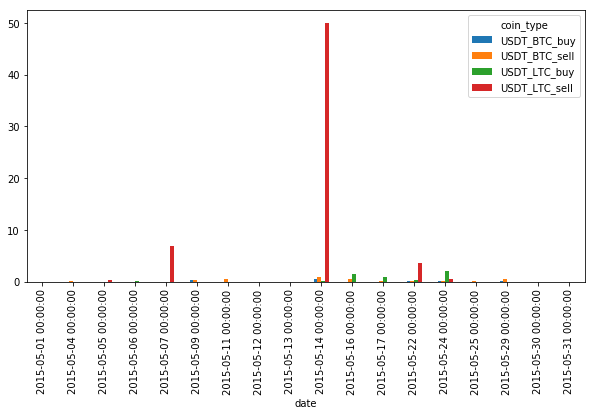

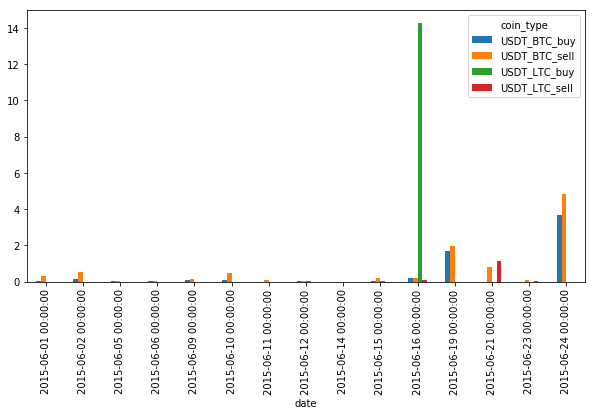

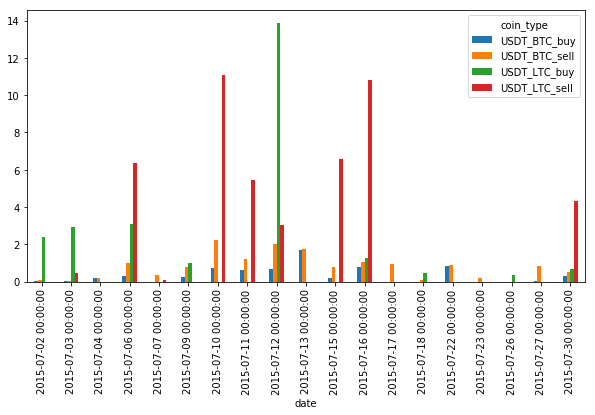

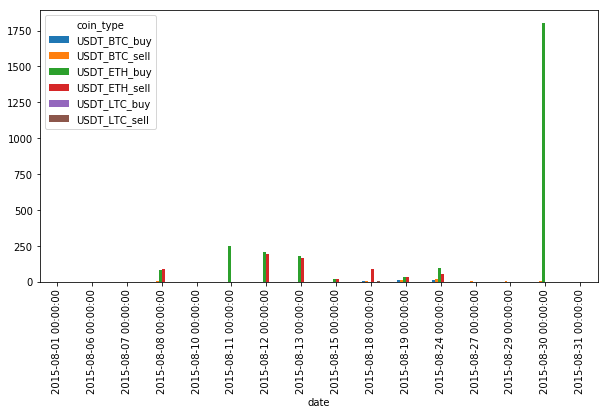

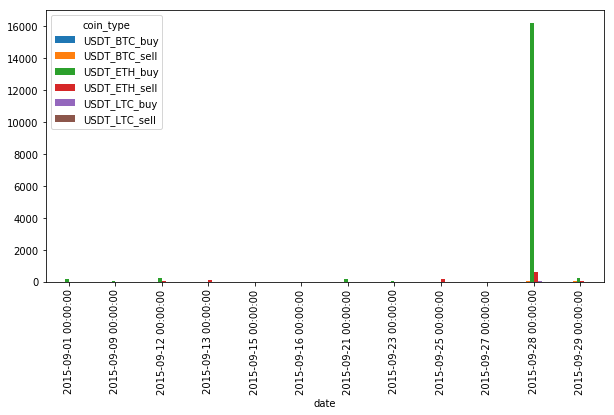

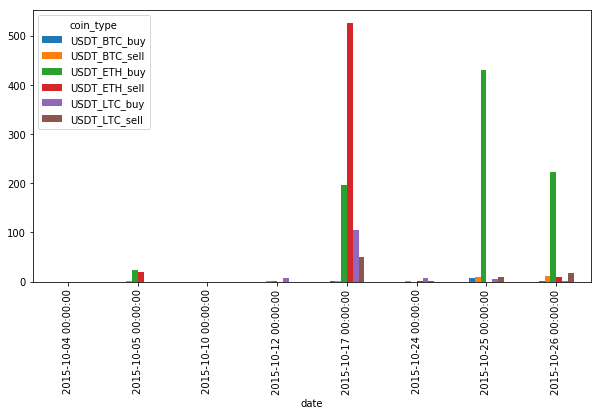

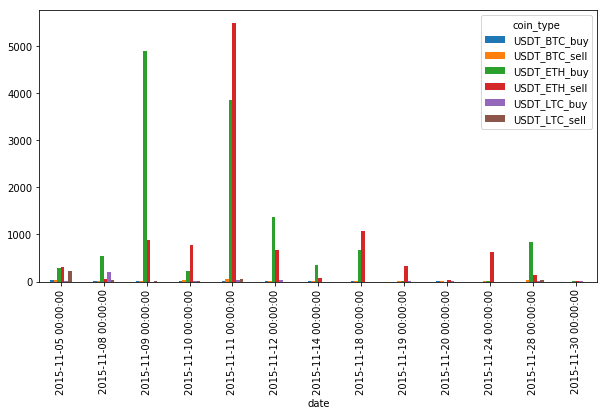

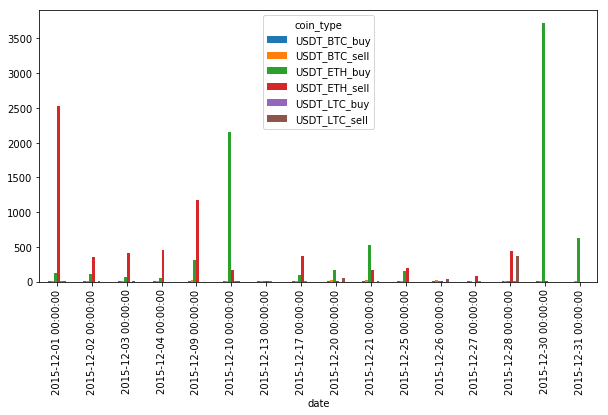

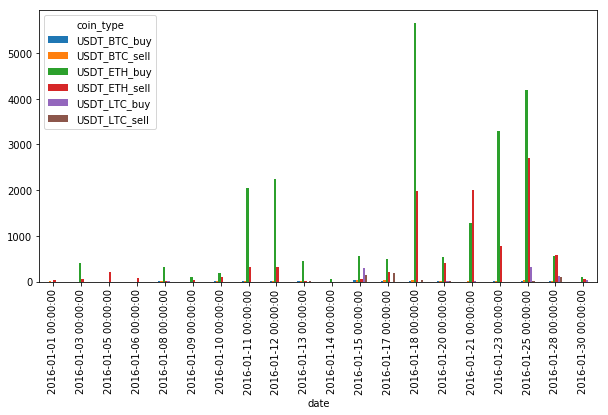

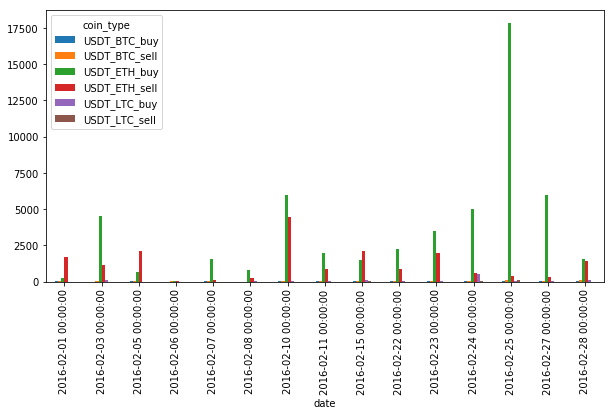

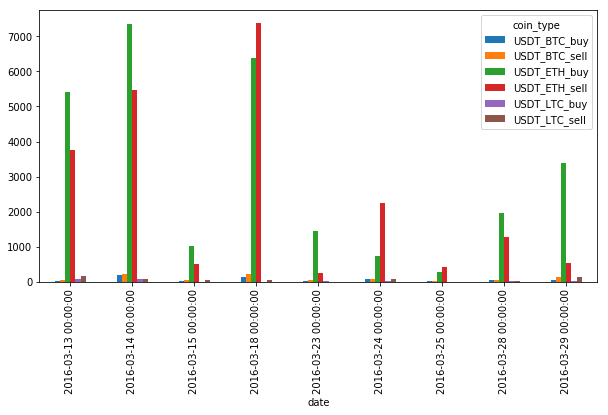

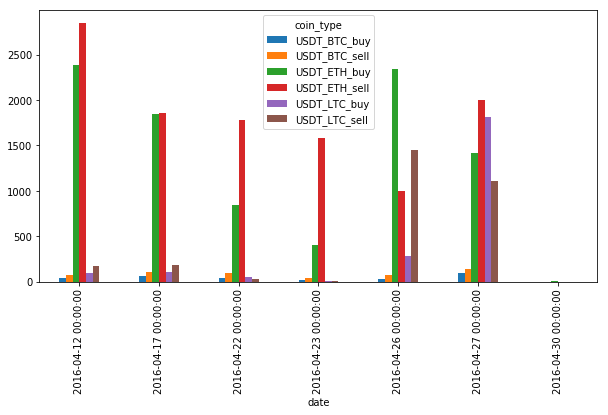

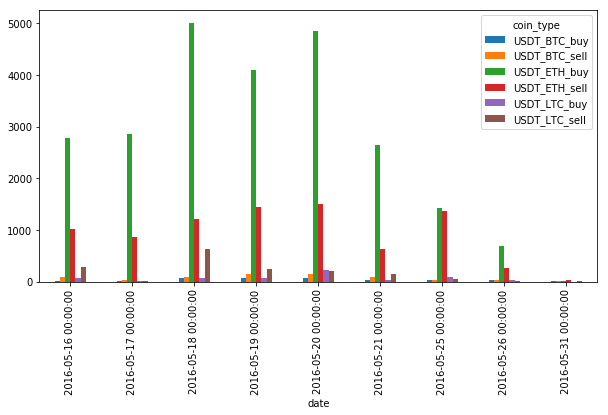

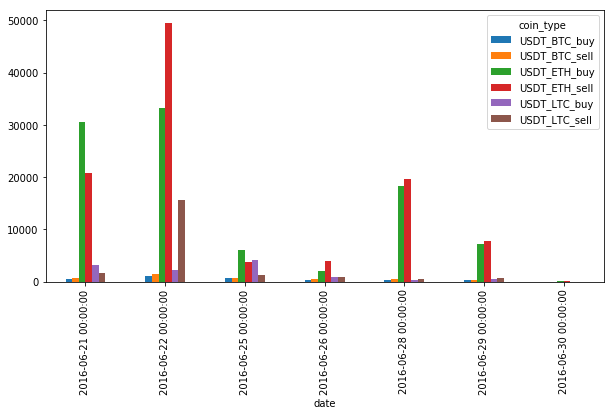

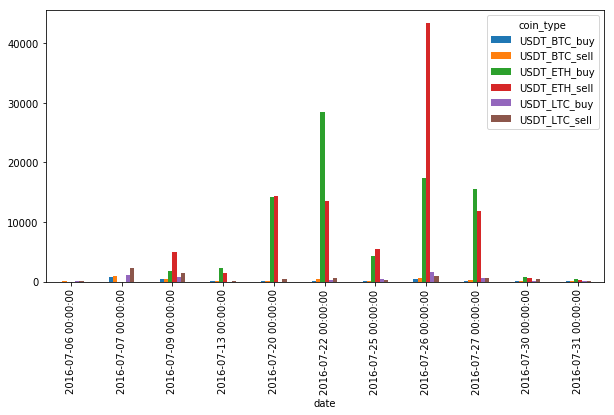

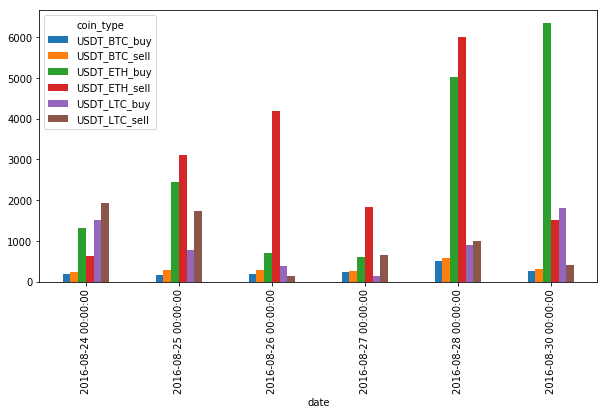

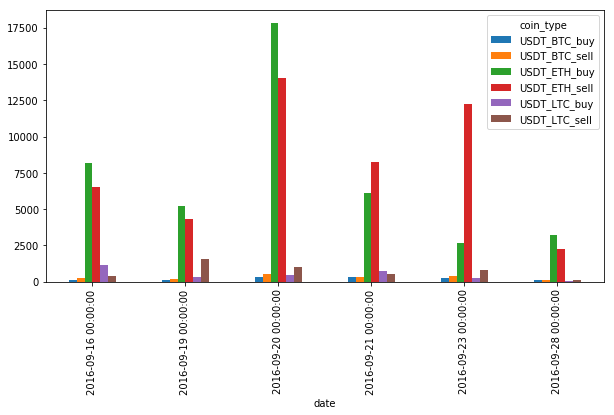

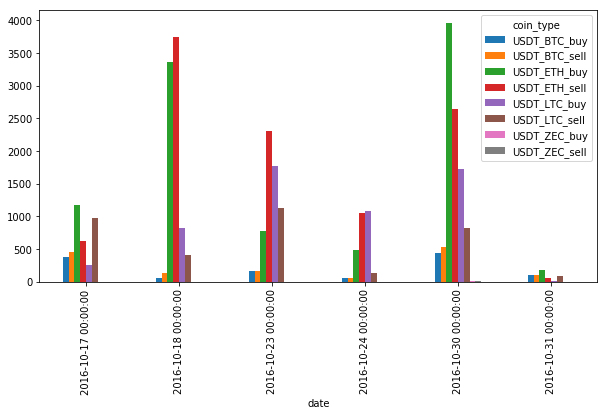

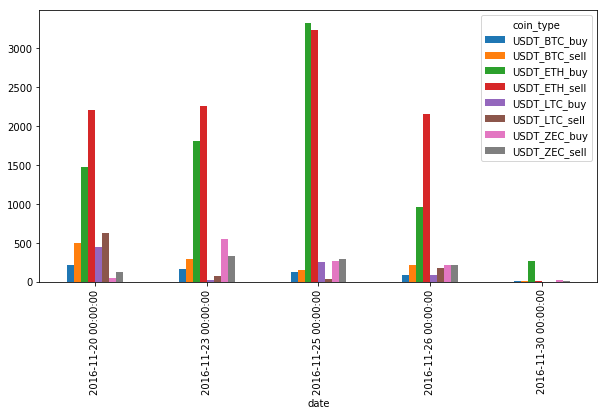

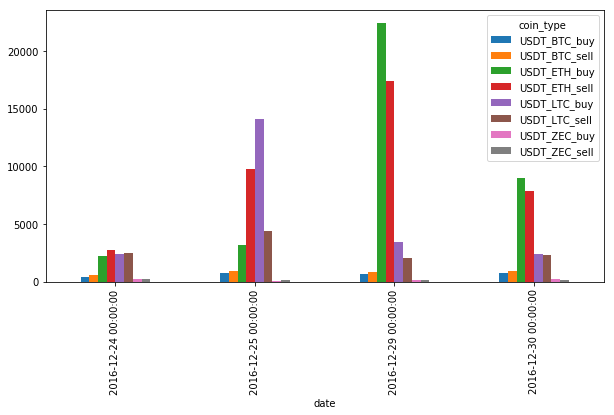

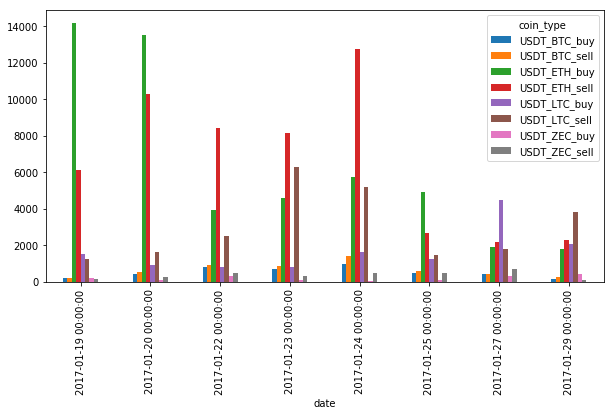

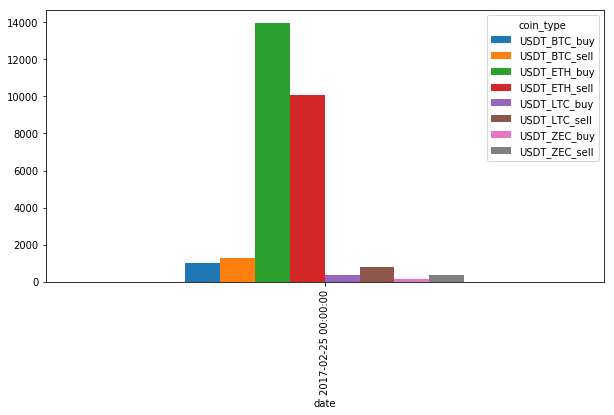

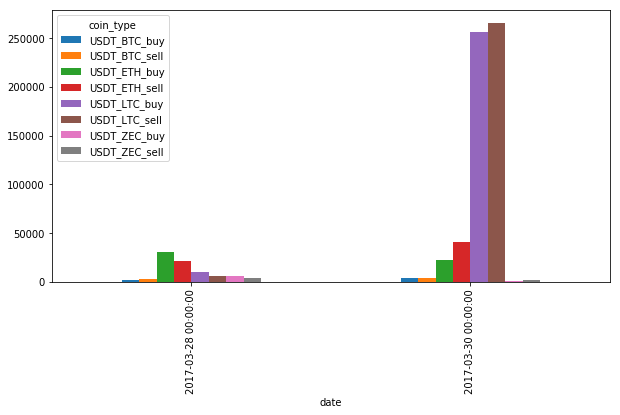

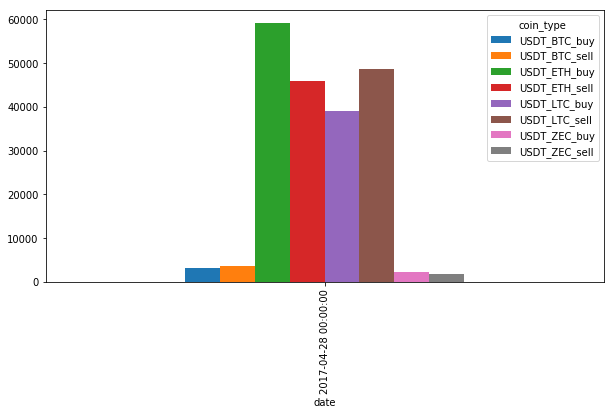

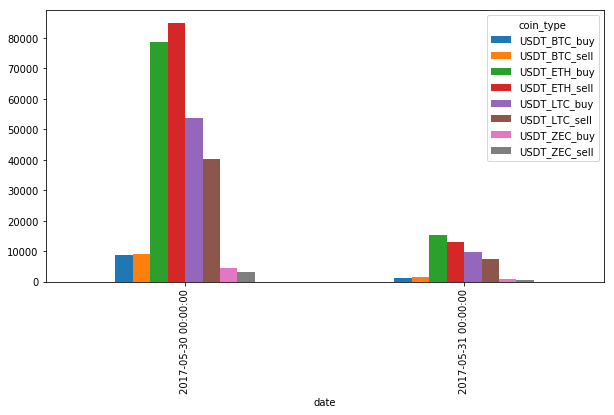

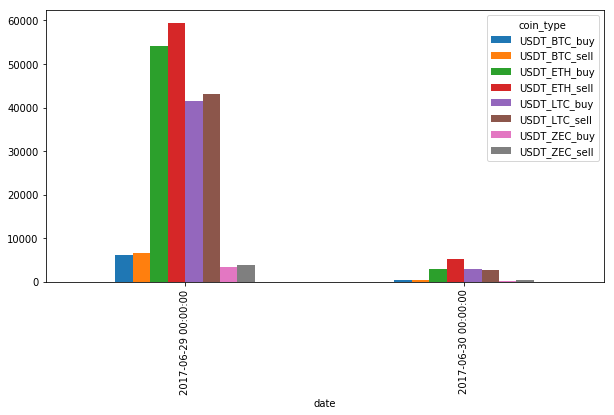

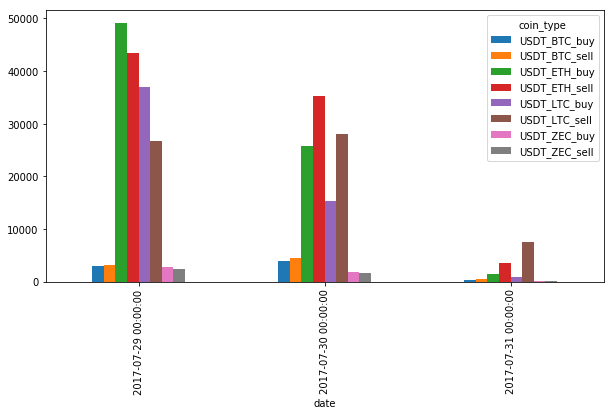

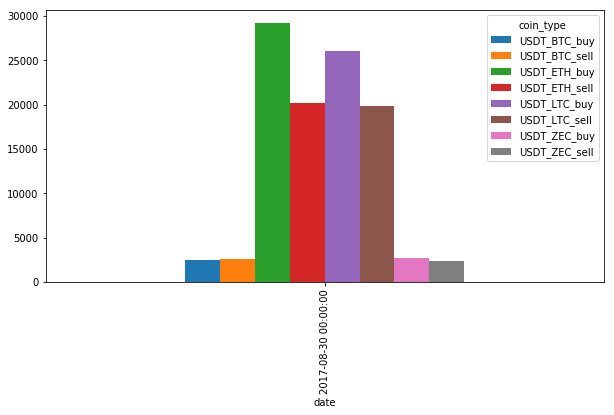

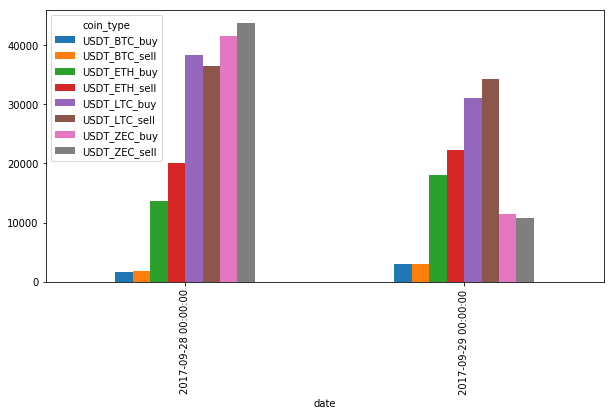

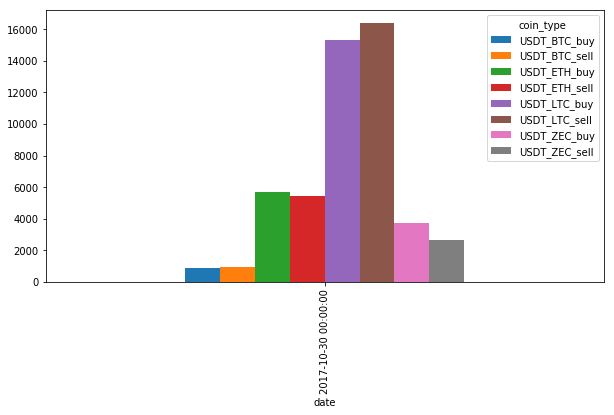

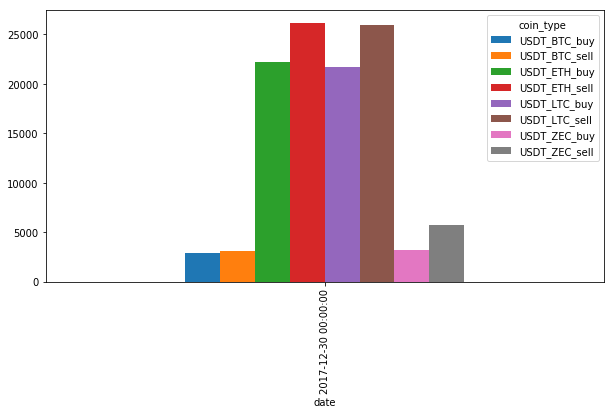

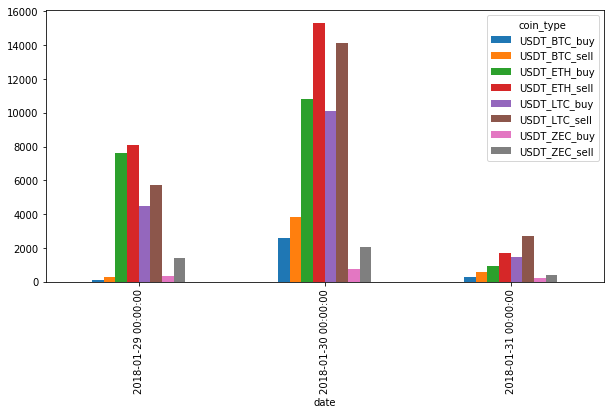

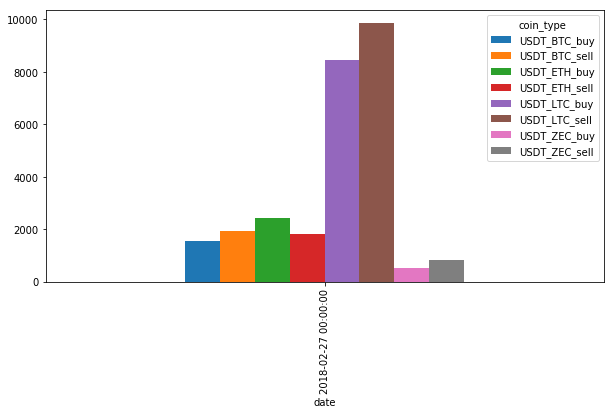

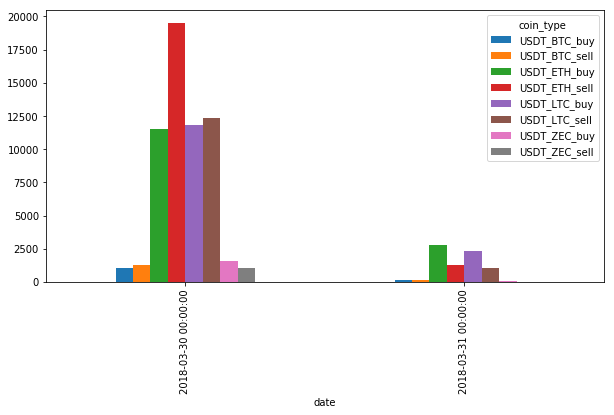

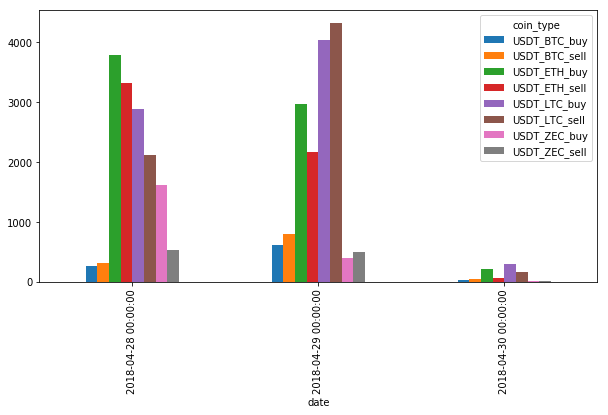

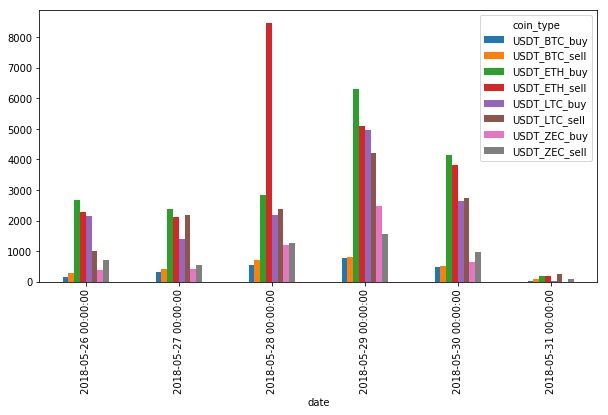

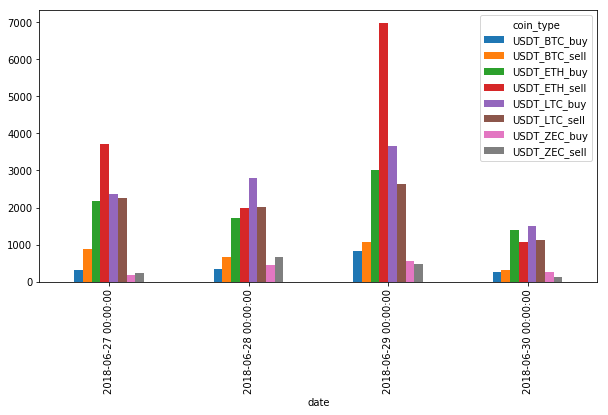

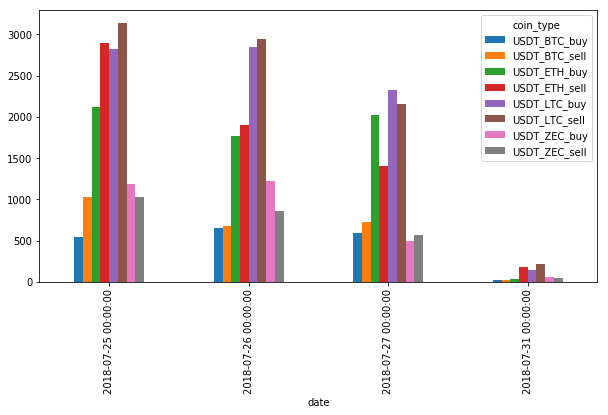

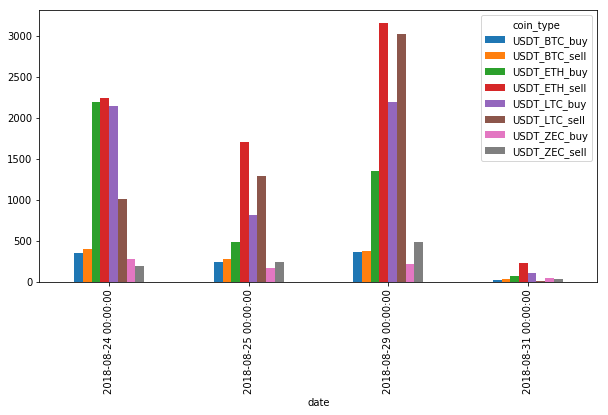

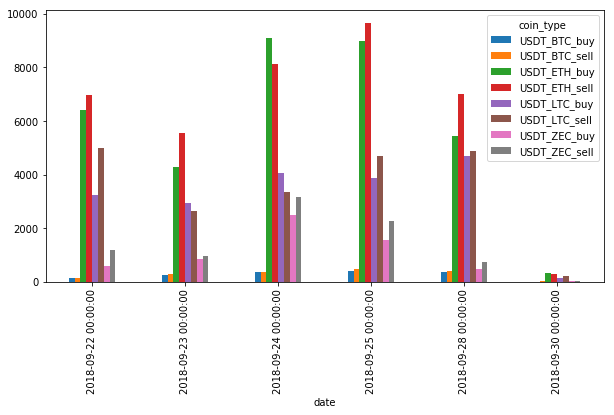

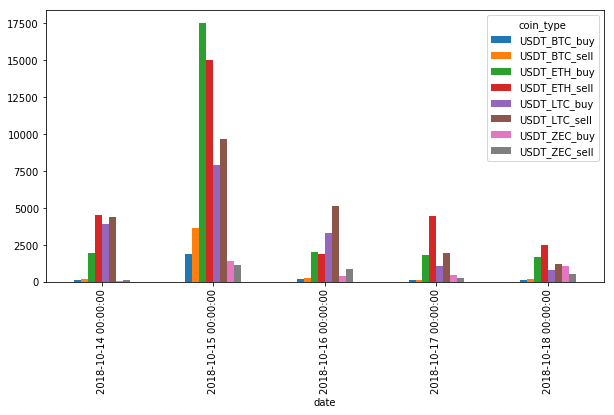

In [145]:
#for data in dt_periodo_queda_btc:
dt_periodo_queda_btc.index = pd.to_datetime(dt_periodo_queda_btc.index)

for year in dt_periodo_queda_btc.index.year.unique() :
    for month in dt_periodo_queda_btc.index[dt_periodo_queda_btc.index.year == year].month.unique() :
        dt_periodo_queda_btc[(dt_periodo_queda_btc.index.year == year) & (dt_periodo_queda_btc.index.month == month)].pivot(columns='coin_type', values='amount').plot(kind='bar', figsize=(10,5))


In [162]:
#Quantidade de dias em que o BTC Sell superou o BTC Buy
pd.DataFrame(dt_periodo_queda_btc.index.unique()).count()

date    322
dtype: int64

In [165]:
alt_periodo_queda_btc = dt_periodo_queda_btc[dt_periodo_queda_btc.coin != 'USDT_BTC']
#alt_periodo_queda_btc.head()
pd.DataFrame(alt_periodo_queda_btc.index.unique()).count()

date    283
dtype: int64